In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import pandas as pd

# 1)

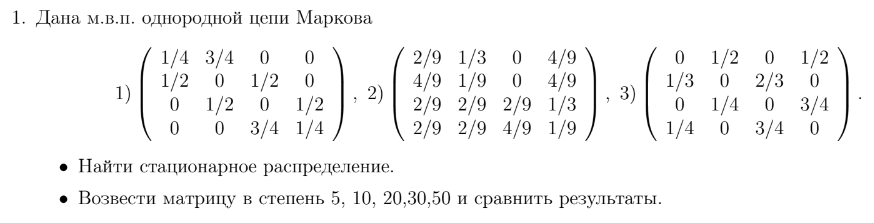


In [16]:
P1=[[0.25,0.75,0,0],
	[0.5,0,0.5,0],	
	[0,0.5,0,0.5],
	[0,0,0.75,0.25]]

P2=[[2/9,1/3,0,4/9],
	[4/9,1/9,0,4/9],
	[2/9,2/9,2/9,1/3],
	[2/9,2/9,4/9,1/9]]

P3=[[0,0.5,0,0.5],
	[1/3,0,2/3,0],
	[0,0.25,0,0.75],
	[0.25,0,0.75,0]]


In [17]:
def Sti(P):#стационарное распределение
	eigenvalues, eigenvectors = np.linalg.eig(P.T)
	stationary_vector = eigenvectors[:, np.isclose(eigenvalues, 1)]
	stationary_vector = stationary_vector[:, 0]
	stationary_vector = stationary_vector / np.sum(stationary_vector)
	vec = np.array(stationary_vector.real.T)
	return vec[0]

A = np.matrix(P1)
B = np.matrix(P2)
C = np.matrix(P3)

num = [1,5,10,11,12,13]

for i in num:
	A = np.linalg.matrix_power(A,i)
	pi = Sti(A)
	print(pi)

print("\n")

for i in num:
	B = np.linalg.matrix_power(B,i)
	#print(f"B^i: '\n'",B)
	pi = Sti(B)

	print(pi)
	
print("\n")

for i in num:
	C = np.linalg.matrix_power(C,i)
	print(f"C^{i}: '\n'",C)
	pi = Sti(C)

	print("aaaa",pi)

[0.2 0.3 0.3 0.2]
[0.2 0.3 0.3 0.2]
[0.2 0.3 0.3 0.2]
[0.2 0.3 0.3 0.2]
[0.2 0.3 0.3 0.2]
[0.2 0.3 0.3 0.2]


[0.27272727 0.22727273 0.18181818 0.31818182]
[0.27272727 0.22727273 0.18181818 0.31818182]
[0.27272727 0.22727273 0.18181818 0.31818182]
[0.27272727 0.22727273 0.18181818 0.31818182]
[0.27272727 0.22727273 0.18181818 0.31818182]
[0.27272727 0.22727273 0.18181818 0.31818182]


C^1: '
' [[0.         0.5        0.         0.5       ]
 [0.33333333 0.         0.66666667 0.        ]
 [0.         0.25       0.         0.75      ]
 [0.25       0.         0.75       0.        ]]
aaaa [0.13829787 0.15957447 0.36170213 0.34042553]
C^5: '
' [[0.         0.31922743 0.         0.68077257]
 [0.27662037 0.         0.72337963 0.        ]
 [0.         0.31911892 0.         0.68088108]
 [0.2765842  0.         0.7234158  0.        ]]
aaaa [0.13829787 0.15957447 0.36170213 0.34042553]
C^10: '
' [[0.27659574 0.         0.72340426 0.        ]
 [0.         0.31914894 0.         0.68085106]
 [0.276595

# 2)

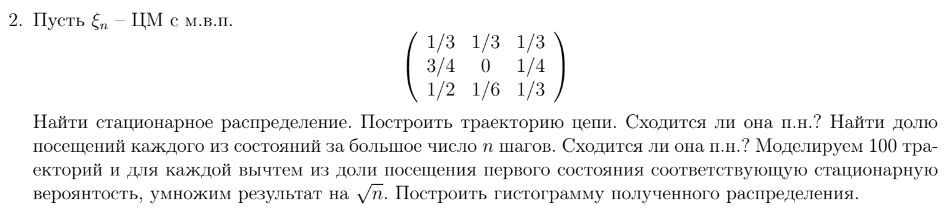

# 1. Стационарное распределение #

In [18]:
P = np.matrix([[1/3,1/3,1/3],
			   [3/4,0,1/4],
			   [1/2,1/6,1/3]])

In [19]:
pi = Sti(P)
pi = np.array(pi)
pi = pi.T
print(pi)

[0.47368421 0.21052632 0.31578947]


# 2. Траектории # 

In [20]:
# Проверка сходимости (к имеющемуся стационарному распределению)
def trajec(n, j):
    # Начальное состояние
    initial_state = 0  # Допустим, начинаем с состояния 0

    num_steps = n
    trajectory = np.zeros(num_steps, dtype=int)
    trajectory[0] = initial_state

    # Генерация траектории цепи Маркова
    for i in range(1, num_steps):
        current_state = trajectory[i - 1]
        if current_state == 0:
            trajectory[i] = np.random.choice([0, 1, 2], p = [1/3, 1/3, 1/3])
        elif current_state == 1:
            trajectory[i] = np.random.choice([0, 2], p = [3/4, 1/4])
        else:
            trajectory[i] = np.random.choice([0, 1, 2], p = [1/2, 1/6, 1/3])

    if j == 1:
        # Построение графика траектории
        plt.figure(figsize=(12, 6))
        plt.plot(trajectory, marker='o', linestyle='-')
        plt.title('Траектория цепи Маркова')
        plt.xlabel('Шаги')
        plt.ylabel('Состояния')
        plt.yticks([0, 1, 2])
        plt.grid(True)
        plt.show()

    unique, counts = np.unique(trajectory, return_counts=True)
    dolya_distribution = counts / num_steps
    return unique, dolya_distribution

# 3. находим распределение спустя n шагов #

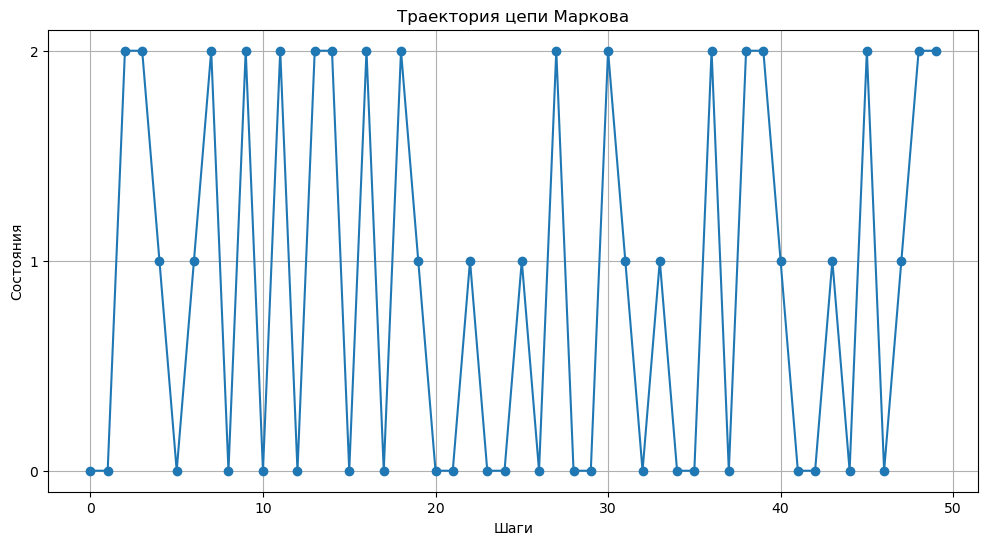

[0.47368421 0.21052632 0.31578947]


[0.46 0.2  0.34]
Стационарное распределение после 50 шагов:
Состояние 0: 0.4600
Состояние 1: 0.2000
Состояние 2: 0.3400
[0.46 0.2  0.34]


In [21]:

n = 50

unique, dolya_distribution = trajec(n, 1) 
print(pi)
print("\n")
print(dolya_distribution)

print("Стационарное распределение после {} шагов:".format(n))
for state, prob in zip(unique, dolya_distribution):
    print(f"Состояние {state}: {prob:.4f}")
print(dolya_distribution)

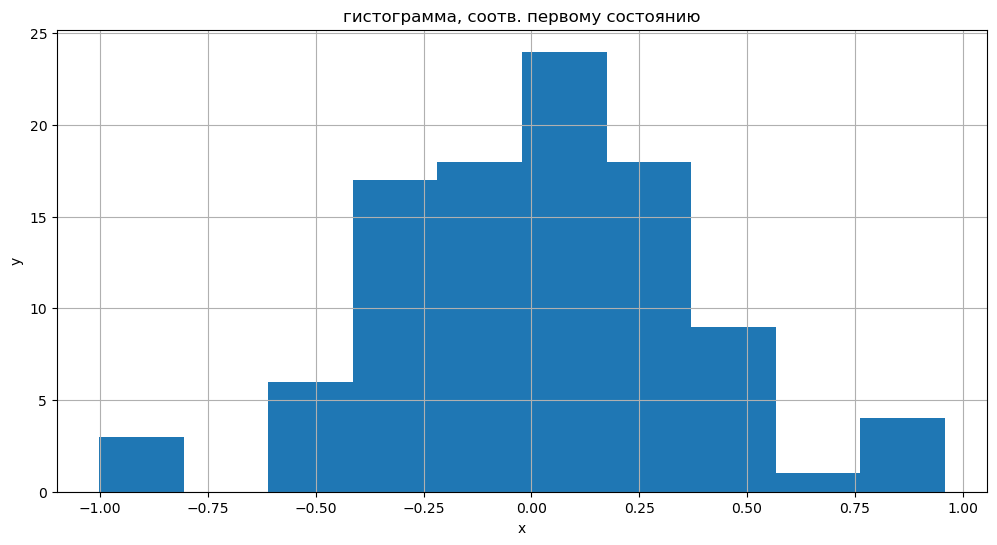

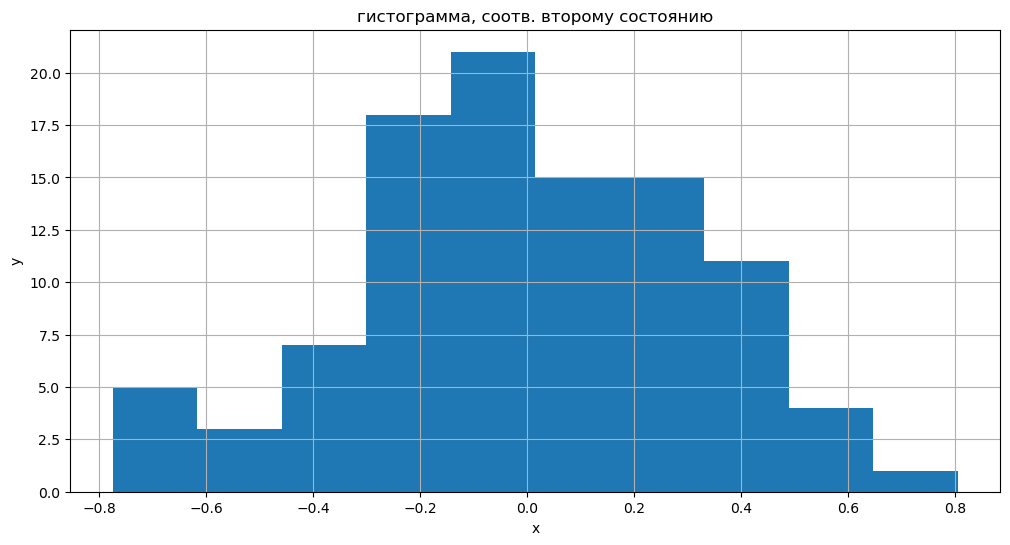

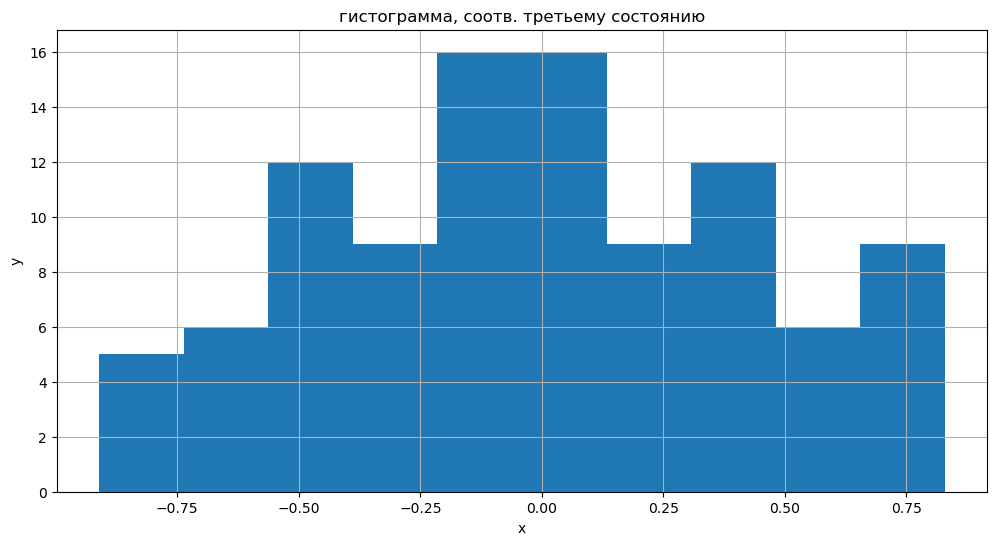

In [22]:

n = 1000
n_traj = 100

new_1 = []
new_2 = []
new_3 = []
n_sqrt = np.array([np.sqrt(n),np.sqrt(n),np.sqrt(n)])



for j in range(n_traj):
    unique, dolya_distribution = trajec(n, 0) # генерируем n_traj траекторий по n шагов, вычетаем из нашего среднего стационарное и умножаем на sqrt(n)
    new = (dolya_distribution - pi) * n_sqrt
    new_1.append(new[0])
    new_2.append(new[1])
    new_3.append(new[2])

plt.figure(figsize = (12,6))
plt.hist(new_1)
plt.title("гистограмма, соотв. первому состоянию")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

plt.figure(figsize = (12,6))
plt.hist(new_2)
plt.title("гистограмма, соотв. второму состоянию")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

plt.figure(figsize = (12,6))
plt.hist(new_3)
plt.title("гистограмма, соотв. третьему состоянию")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()



# 3)

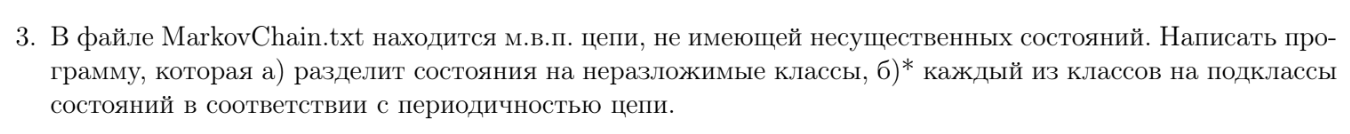

In [23]:
def cla(P):
    n = len(P)
    visited = np.zeros(n)
    def DFS(P, x, cl):
        visited[x] = 1
        cl.append(x)
        for ind, p in enumerate(P[x]):
            if p>0 and visited[ind] == 0:
                DFS(P, ind, cl)
    c = []
    for i in range(n):
        if(visited[i]==0):
            cl = []
            DFS(P, i, cl)
            c.append(cl)
    return c

In [24]:
import numpy as np
P = np.loadtxt('MarkovChain.txt', delimiter=';')
c = cla(P)
for i in range(len(c)):
    print(f'{i})', c[i])
    
print(P)

0) [0, 37]
1) [1, 5, 2, 10, 14, 9, 7, 12, 26, 11, 13, 15, 28, 20, 19, 21, 30, 25, 27, 29, 35, 44, 47, 49, 32, 33, 34, 42, 43]
2) [3, 17, 48]
3) [4, 16, 18, 22, 41, 46]
4) [6, 24, 8, 36, 23, 40, 38, 45]
5) [31, 39]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.11111111 0.         0.11111111]
 ...
 [0.         0.2        0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.2        0.         ... 0.         0.         0.        ]]


# 4)

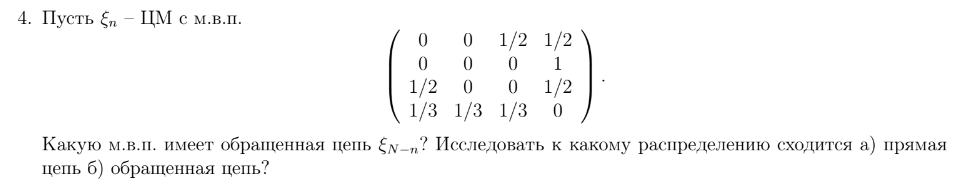

In [55]:
P = [[0,0,0.5,0.5],
     [0,0,0,1],
     [0.5,0,0,0.5],
     [1/3,1/3,1/3,0]]

In [68]:
 #(p_ij)' = (p_ji)pj_j/pi_i 
P = np.matrix(P)
vec = Sti(P)
print("стационарный вектор исходной матрицы:", vec)
print("\n")
print("исходная матрица:\n", P)

PP = []
for i in range(P.shape[0]):
    PP.append([])
    for j in range(P.shape[1]):
        PP[i].append(P[j,i]*vec[j] / vec[i])

print('\n')
PP = np.matrix(PP)
print("обращенная матрица:\n", PP)

print("\n")
vec_inv = Sti(PP)
print("стационарный вектор обращенной матрицы:", vec_inv)


стационарный вектор исходной матрицы: [0.25  0.125 0.25  0.375]


исходная матрица:
 [[0.         0.         0.5        0.5       ]
 [0.         0.         0.         1.        ]
 [0.5        0.         0.         0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]]


обращенная матрица:
 [[0.         0.         0.5        0.5       ]
 [0.         0.         0.         1.        ]
 [0.5        0.         0.         0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]]


стационарный вектор обращенной матрицы: [0.25  0.125 0.25  0.375]


# 5)

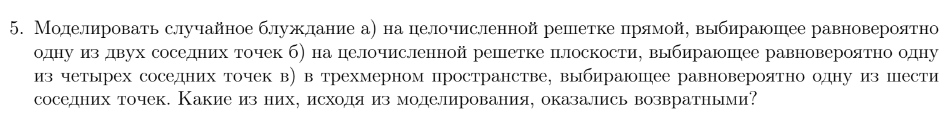

In [16]:
n, m = 100000, 100
x = np.random.choice([-1, 1], size=(m,n))
s = np.cumsum(x, axis = 1)
count_zeros = np.sum((s == 0) , axis=1)
print(count_zeros)

print(np.mean(np.array(count_zeros)>0))

[790 120 709 139  92 116  99  91 173 135 255 411 343 244 249 108 103 364
 252 333 331 377  40 173 348  76 179 284 362 330 245 394 200  98 182 149
 366 202  43  85 126 177 356 284 336 208 155 119 216 413 209  54 297 394
  64 157 354 177  55 437 132  42   6 302 309 228  68 275 253 466 326 220
 289  36 419 483 249 157 288 326 318  60   8 227 465  80 159 219 224 123
  14 122 164 180 309 300 112  24 133 157]
1.0


In [17]:
n, m = 100000, 1000
x = np.random.choice([-1, 1], size=(m,n))
y = np.random.choice([-1, 1], size=(m,n))
s_x = np.cumsum(x, axis = 1)
s_y = np.cumsum(y, axis = 1)
count_zeros = np.sum((s_x == 0) & (s_y == 0), axis=1)
print(count_zeros)

print(np.mean(np.array(count_zeros)>0))
#возвратное

[ 0  9 30  1  7  0  0  0  1  5  8  1  0  7  1  0  3  0  4  2  0  0  1  8
  4  0 15  2  3  1  9 12 16  0  5  6  8  0  3  2  4  1  0  1  9  5  1  2
  2  0  2  1  1 10  3  2  4  1  9  0  1  5  0  5  2  0  2  0  1  3  4 14
  1  0  8  9  1  3  0  1  1  0  0  0 16  2  0  3  0  0  0  4  3  1  3  1
 14  3  2  0  0  4  1  0  1  3 12  5  1  4 10  5  3  1  4  5  4  2  1  1
  2  2  2  3  4  2  0  0  4  0  0 10  7  8  6  7  0  1  2  0  4  0 14  4
  3  2 14  0  8  2  2  2  5  2  2  4  3  2  6  4  0  6  4  1  4  0  1  0
  3  0  6  0  3  2  3  1  2  1  7  1  4  8  8  1  7  2  8  3  2  5  2  2
  5  6  5 13  1  2  3  2  1 10  4  2  0  2  0  0  6  0  1  2 12  1 15  3
  2  7  0  4  5  2  1  3  0 11  4  6  4  0  1  2  1  0  0  0  1  0  0  1
  0  0  0  3  2  1  1  2  7  4  4  0  8  9  8  3  2  5  0  0  3 11  1  8
  3  1  0  8  0  2  6  3  2  6  9  7  6  0  2  1  1  2  0 15  2  2  0  1
  5 18  0  6  4  9  0  0  0  8  5  2  6  5  3  3  0  3  9  9  0 12  2  1
  1  5  0  5  4  2  3  0 10  1  7  2  9 14  0  6  4

In [18]:
n, m = 10000, 1000
x = np.random.choice([-1, 1], size=(m,n))
y = np.random.choice([-1, 1], size=(m,n))
z = np.random.choice([-1, 1], size=(m,n))
s_x = np.cumsum(x, axis = 1)
s_y = np.cumsum(y, axis = 1)
s_z = np.cumsum(z, axis = 1)
count_zeros = np.sum((s_x == 0) & (s_y == 0) & (s_z == 0), axis=1)
print(count_zeros)
print(np.mean(count_zeros/n))
print(np.sum(count_zeros))
print(np.mean(np.array(count_zeros)>0))

[3 0 3 0 0 0 0 0 2 2 0 0 1 0 3 0 0 0 0 1 0 0 1 0 0 0 0 0 1 2 0 0 0 0 0 0 1
 0 0 0 0 0 0 2 0 0 0 0 0 5 1 0 1 0 0 0 0 0 1 0 0 1 0 3 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 2 0 0 1 1 1 1 0 0 0 0
 3 5 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 2 0 1 0 1 0 1 0 1
 0 0 1 3 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 2 0 0 0 1 1
 0 0 0 0 0 2 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1
 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 2 0 0 0 1 4 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 2 0 0 1 0 1 0 1 2 0 0 0
 0 0 0 0 0 1 0 0 0 2 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 4 0 0 0 1 0
 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 2 1 0 1 0 0 1 0 0 0 2 0 0
 2 0 2 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 2 0 1 0 1 0 1 0 0 0 0 0 0 3
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 3 0 2 0 0 0 0 1 0 0 1 0 1 0 1 3 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 

100
90


### Вывод: с увеличением количества шагов в 1 эксперименте в одномерном и двумерном мы стремимся к стационарному, то есть чаще возвращаемся в 0, а в R^3 уже наоборот
